<a href="https://colab.research.google.com/github/FSDAwaesf/Parking-recommendation-system-Autonmous-Vehicle/blob/main/ML_model_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [135]:
data=pd.read_csv(r"/content/Edited.csv")
data

,Date,Time,Weather,Parking
0,Monday,0700 - 0715,sunny,Spot A
1,Monday,0715 - 0730,sunny,Spot A
2,Monday,0730 - 0745,sunny,Spot A
3,Monday,0745 - 0800,sunny,Spot A
4,Monday,0800 - 0815,sunny,Spot A
...,...,...,...,...
3195,Tuesday,0745 - 0800,rainy,Spot D
3196,Tuesday,0800 - 0815,rainy,Spot D
3197,Tuesday,0815 - 0830,rainy,Spot D
3198,Tuesday,0830 - 0845,rainy,Spot D


In [136]:
data.isna().sum()

Date       0
Time       0
Weather    0
Parking    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


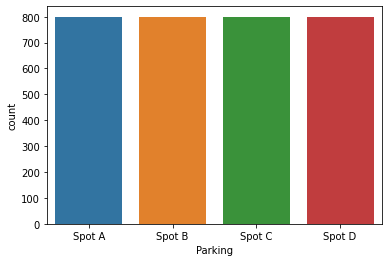

In [137]:
sn.countplot(data['Parking'])

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     3200 non-null   object
 1   Time     3200 non-null   object
 2   Weather  3200 non-null   object
 3   Parking  3200 non-null   object
dtypes: object(4)
memory usage: 100.1+ KB


In [139]:
data[['Start_time','End_time']]=data['Time'].str.split('-',expand=True)

In [140]:
data

,Date,Time,Weather,Parking,Start_time,End_time
0,Monday,0700 - 0715,sunny,Spot A,0700,0715
1,Monday,0715 - 0730,sunny,Spot A,0715,0730
2,Monday,0730 - 0745,sunny,Spot A,0730,0745
3,Monday,0745 - 0800,sunny,Spot A,0745,0800
4,Monday,0800 - 0815,sunny,Spot A,0800,0815
...,...,...,...,...,...,...
3195,Tuesday,0745 - 0800,rainy,Spot D,0745,0800
3196,Tuesday,0800 - 0815,rainy,Spot D,0800,0815
3197,Tuesday,0815 - 0830,rainy,Spot D,0815,0830
3198,Tuesday,0830 - 0845,rainy,Spot D,0830,0845


In [141]:
data['Start_time'].str.split(expand=True,n=4)

,0
0,0700
1,0715
2,0730
3,0745
4,0800
...,...
3195,0745
3196,0800
3197,0815
3198,0830


In [142]:
len(data['Start_time'][0])

5

In [143]:
data['Start_time']

0       0700 
1       0715 
2       0730 
3       0745 
4       0800 
        ...  
3195    0745 
3196    0800 
3197    0815 
3198    0830 
3199    0845 
Name: Start_time, Length: 3200, dtype: object

In [144]:
start_Hour=[]
slice=""
for i in range(len(data['Start_time'])):
  slice=""
  for j in range(2):
    slice=slice+data['Start_time'][i][j]
  start_Hour.append(slice)  
  
  

In [145]:
len(start_Hour)

3200

In [146]:
start_min=[]
slice=""
for i in range(len(data['Start_time'])):
  slice=""
  for j in range(2,4):
    slice=slice+data['Start_time'][i][j]
  start_min.append(slice)
  

In [147]:
len(start_min)

3200

In [148]:
data['End_time'][0]

' 0715'

In [149]:
End_Hour=[]
slice=""
for i in range(len(data['End_time'])):
  slice=""
  for j in range(1,3):
    slice=slice+data['End_time'][i][j]
  End_Hour.append(slice) 
  

In [150]:
end_min=[]
slice=""
for i in range(len(data['End_time'])):
  slice=""
  for j in range(2,4):
    slice=slice+data['End_time'][i][j]
  end_min.append(slice)
  

In [151]:
data['start_Hour']=start_Hour

In [152]:
data['start_min']=start_min

In [153]:
data

,Date,Time,Weather,Parking,Start_time,End_time,start_Hour,start_min
0,Monday,0700 - 0715,sunny,Spot A,0700,0715,07,00
1,Monday,0715 - 0730,sunny,Spot A,0715,0730,07,15
2,Monday,0730 - 0745,sunny,Spot A,0730,0745,07,30
3,Monday,0745 - 0800,sunny,Spot A,0745,0800,07,45
4,Monday,0800 - 0815,sunny,Spot A,0800,0815,08,00
...,...,...,...,...,...,...,...,...
3195,Tuesday,0745 - 0800,rainy,Spot D,0745,0800,07,45
3196,Tuesday,0800 - 0815,rainy,Spot D,0800,0815,08,00
3197,Tuesday,0815 - 0830,rainy,Spot D,0815,0830,08,15
3198,Tuesday,0830 - 0845,rainy,Spot D,0830,0845,08,30


In [154]:
data['end_Hour'],data['end_Min']=End_Hour,end_min

In [155]:
data

,Date,Time,Weather,Parking,Start_time,End_time,start_Hour,start_min,end_Hour,end_Min
0,Monday,0700 - 0715,sunny,Spot A,0700,0715,07,00,07,71
1,Monday,0715 - 0730,sunny,Spot A,0715,0730,07,15,07,73
2,Monday,0730 - 0745,sunny,Spot A,0730,0745,07,30,07,74
3,Monday,0745 - 0800,sunny,Spot A,0745,0800,07,45,08,80
4,Monday,0800 - 0815,sunny,Spot A,0800,0815,08,00,08,81
...,...,...,...,...,...,...,...,...,...,...
3195,Tuesday,0745 - 0800,rainy,Spot D,0745,0800,07,45,08,80
3196,Tuesday,0800 - 0815,rainy,Spot D,0800,0815,08,00,08,81
3197,Tuesday,0815 - 0830,rainy,Spot D,0815,0830,08,15,08,83
3198,Tuesday,0830 - 0845,rainy,Spot D,0830,0845,08,30,08,84


In [156]:
data.drop('Time',axis=1,inplace=True)

In [157]:
data.drop('Start_time',axis=1,inplace=True)
data.drop('End_time',axis=1,inplace=True)

In [158]:
data

,Date,Weather,Parking,start_Hour,start_min,end_Hour,end_Min
0,Monday,sunny,Spot A,07,00,07,71
1,Monday,sunny,Spot A,07,15,07,73
2,Monday,sunny,Spot A,07,30,07,74
3,Monday,sunny,Spot A,07,45,08,80
4,Monday,sunny,Spot A,08,00,08,81
...,...,...,...,...,...,...,...
3195,Tuesday,rainy,Spot D,07,45,08,80
3196,Tuesday,rainy,Spot D,08,00,08,81
3197,Tuesday,rainy,Spot D,08,15,08,83
3198,Tuesday,rainy,Spot D,08,30,08,84


In [162]:
start_H=data['start_Hour'].str.split('0',expand=True)
data['start_Hour']=start_H.iloc[:,1]

In [160]:
end_h=data['end_Hour'].str.split('0',expand=True)
data['end_Hour']=end_h.iloc[:,1]

In [170]:
data

,Date,Weather,Parking,start_Hour,start_min,end_Hour,end_Min,target
0,Monday,sunny,Spot A,7,0,7,71,Spot A
1,Monday,sunny,Spot A,7,15,7,73,Spot A
2,Monday,sunny,Spot A,7,30,7,74,Spot A
3,Monday,sunny,Spot A,7,45,8,80,Spot A
4,Monday,sunny,Spot A,8,0,8,81,Spot A
...,...,...,...,...,...,...,...,...
3195,Tuesday,rainy,Spot D,7,45,8,80,Spot D
3196,Tuesday,rainy,Spot D,8,0,8,81,Spot D
3197,Tuesday,rainy,Spot D,8,15,8,83,Spot D
3198,Tuesday,rainy,Spot D,8,30,8,84,Spot D


In [165]:
data['start_min']=data['start_min'].replace({'00':'0'})

In [167]:
data['end_Min']=data['end_Min'].replace({'00':'0'})

In [169]:
data['target']=data['Parking']

In [172]:
data.drop('Parking',axis=1,inplace=True)

In [173]:
data

,Date,Weather,start_Hour,start_min,end_Hour,end_Min,target
0,Monday,sunny,7,0,7,71,Spot A
1,Monday,sunny,7,15,7,73,Spot A
2,Monday,sunny,7,30,7,74,Spot A
3,Monday,sunny,7,45,8,80,Spot A
4,Monday,sunny,8,0,8,81,Spot A
...,...,...,...,...,...,...,...
3195,Tuesday,rainy,7,45,8,80,Spot D
3196,Tuesday,rainy,8,0,8,81,Spot D
3197,Tuesday,rainy,8,15,8,83,Spot D
3198,Tuesday,rainy,8,30,8,84,Spot D
